<a href="https://colab.research.google.com/github/korayercan/WeatherHistory-Regression/blob/main/WeatherHistoryRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet, LassoCV, RidgeCV, ElasticNetCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [90]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/weatherHistory.csv")
df.head()

,Formatted Date,Summary,Precip Type,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Formatted Date            96453 non-null  object 
 1   Summary                   96453 non-null  object 
 2   Precip Type               95936 non-null  object 
 3   Temperature (C)           96453 non-null  float64
 4   Apparent Temperature (C)  96453 non-null  float64
 5   Humidity                  96453 non-null  float64
 6   Wind Speed (km/h)         96453 non-null  float64
 7   Wind Bearing (degrees)    96453 non-null  float64
 8   Visibility (km)           96453 non-null  float64
 9   Loud Cover                96453 non-null  float64
 10  Pressure (millibars)      96453 non-null  float64
 11  Daily Summary             96453 non-null  object 
dtypes: float64(8), object(4)
memory usage: 8.8+ MB


In [92]:
df.Summary.unique()

array(['Partly Cloudy', 'Mostly Cloudy', 'Overcast', 'Foggy',
       'Breezy and Mostly Cloudy', 'Clear', 'Breezy and Partly Cloudy',
       'Breezy and Overcast', 'Humid and Mostly Cloudy',
       'Humid and Partly Cloudy', 'Windy and Foggy', 'Windy and Overcast',
       'Breezy and Foggy', 'Windy and Partly Cloudy', 'Breezy',
       'Dry and Partly Cloudy', 'Windy and Mostly Cloudy',
       'Dangerously Windy and Partly Cloudy', 'Dry', 'Windy',
       'Humid and Overcast', 'Light Rain', 'Drizzle', 'Windy and Dry',
       'Dry and Mostly Cloudy', 'Breezy and Dry', 'Rain'], dtype=object)

In [93]:
df["Precip Type"].unique()

array(['rain', 'snow', nan], dtype=object)

In [94]:
df["Precip Type"] = df["Precip Type"].fillna("none")
df["Precip Type"].unique()

array(['rain', 'snow', 'none'], dtype=object)

In [95]:
df.columns

Index(['Formatted Date', 'Summary', 'Precip Type', 'Temperature (C)',
       'Apparent Temperature (C)', 'Humidity', 'Wind Speed (km/h)',
       'Wind Bearing (degrees)', 'Visibility (km)', 'Loud Cover',
       'Pressure (millibars)', 'Daily Summary'],
      dtype='object')

In [96]:
df = pd.get_dummies(df, columns=["Precip Type"], drop_first=True)

In [97]:
df.head()

,Formatted Date,Summary,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Daily Summary,Precip Type_rain,Precip Type_snow
0,2006-04-01 00:00:00.000 +0200,Partly Cloudy,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.,True,False
1,2006-04-01 01:00:00.000 +0200,Partly Cloudy,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.,True,False
2,2006-04-01 02:00:00.000 +0200,Mostly Cloudy,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.,True,False
3,2006-04-01 03:00:00.000 +0200,Partly Cloudy,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.,True,False
4,2006-04-01 04:00:00.000 +0200,Mostly Cloudy,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.,True,False


In [98]:
df.drop(["Formatted Date","Summary","Daily Summary"], axis = 1, inplace = True)

In [99]:
df.head()

,Temperature (C),Apparent Temperature (C),Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Precip Type_rain,Precip Type_snow
0,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,True,False
1,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,True,False
2,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,True,False
3,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,True,False
4,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,True,False


In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96453 entries, 0 to 96452
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Temperature (C)           96453 non-null  float64
 1   Apparent Temperature (C)  96453 non-null  float64
 2   Humidity                  96453 non-null  float64
 3   Wind Speed (km/h)         96453 non-null  float64
 4   Wind Bearing (degrees)    96453 non-null  float64
 5   Visibility (km)           96453 non-null  float64
 6   Loud Cover                96453 non-null  float64
 7   Pressure (millibars)      96453 non-null  float64
 8   Precip Type_rain          96453 non-null  bool   
 9   Precip Type_snow          96453 non-null  bool   
dtypes: bool(2), float64(8)
memory usage: 6.1 MB


In [101]:
#hist-kde

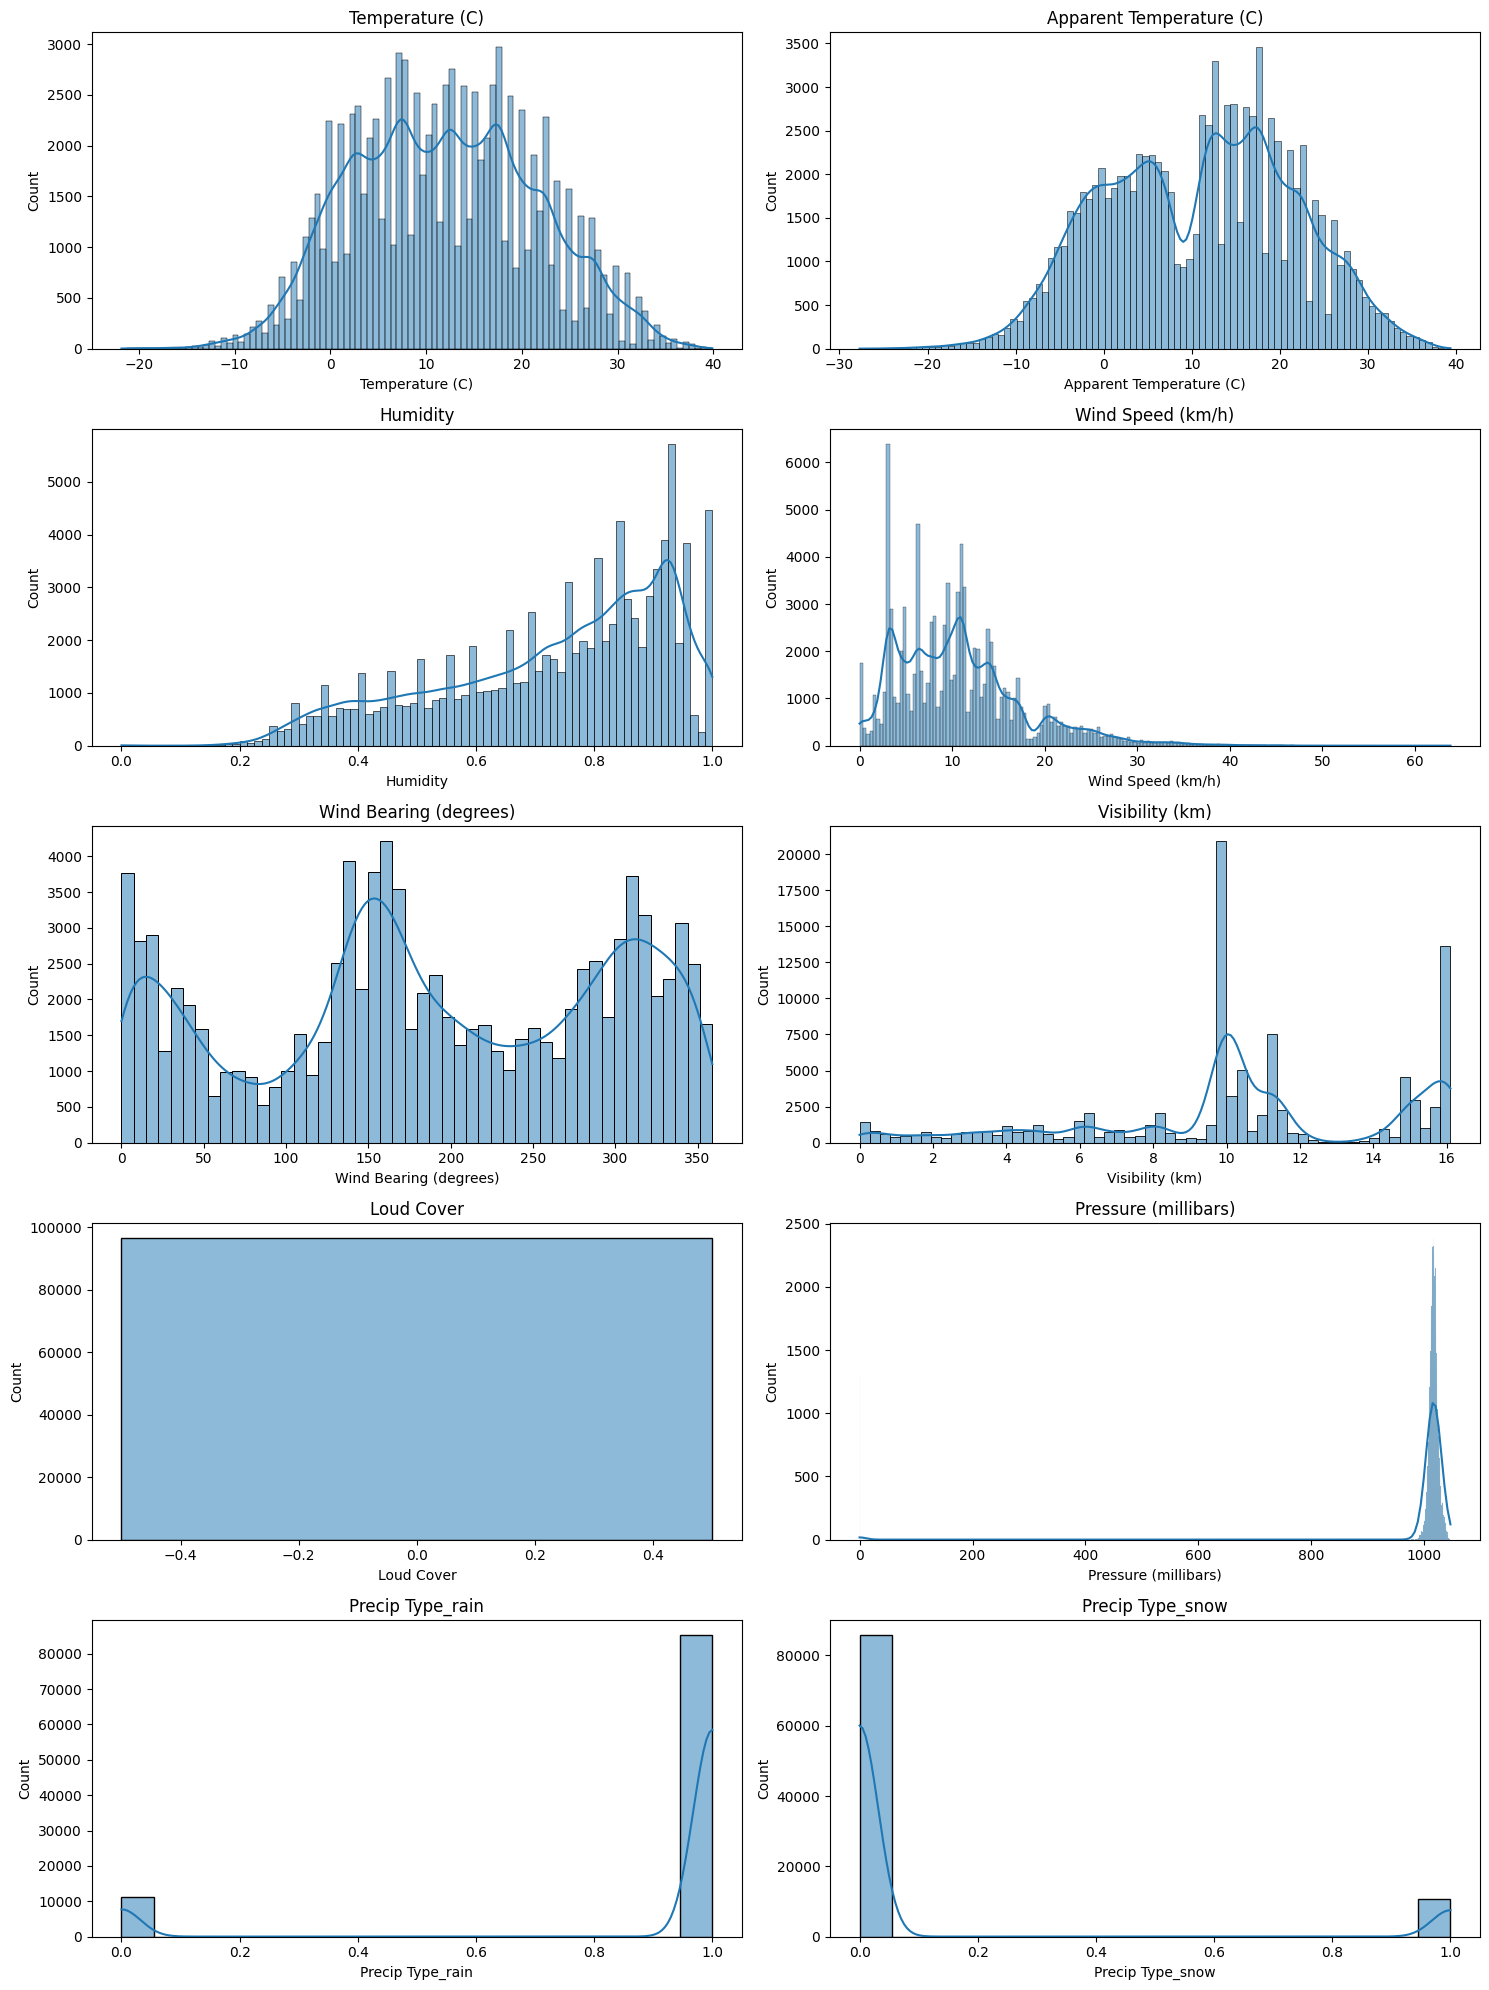

In [102]:
fig, axes = plt.subplots(5, 2, figsize=(15, 20))
axes = axes.flatten()

for i, col in enumerate(df.columns):
    sns.histplot(df[col], kde=True, ax=axes[i])
    axes[i].set_title(col)
plt.tight_layout()
plt.show()

In [103]:
#pair plot

<Figure size 1500x1000 with 0 Axes>

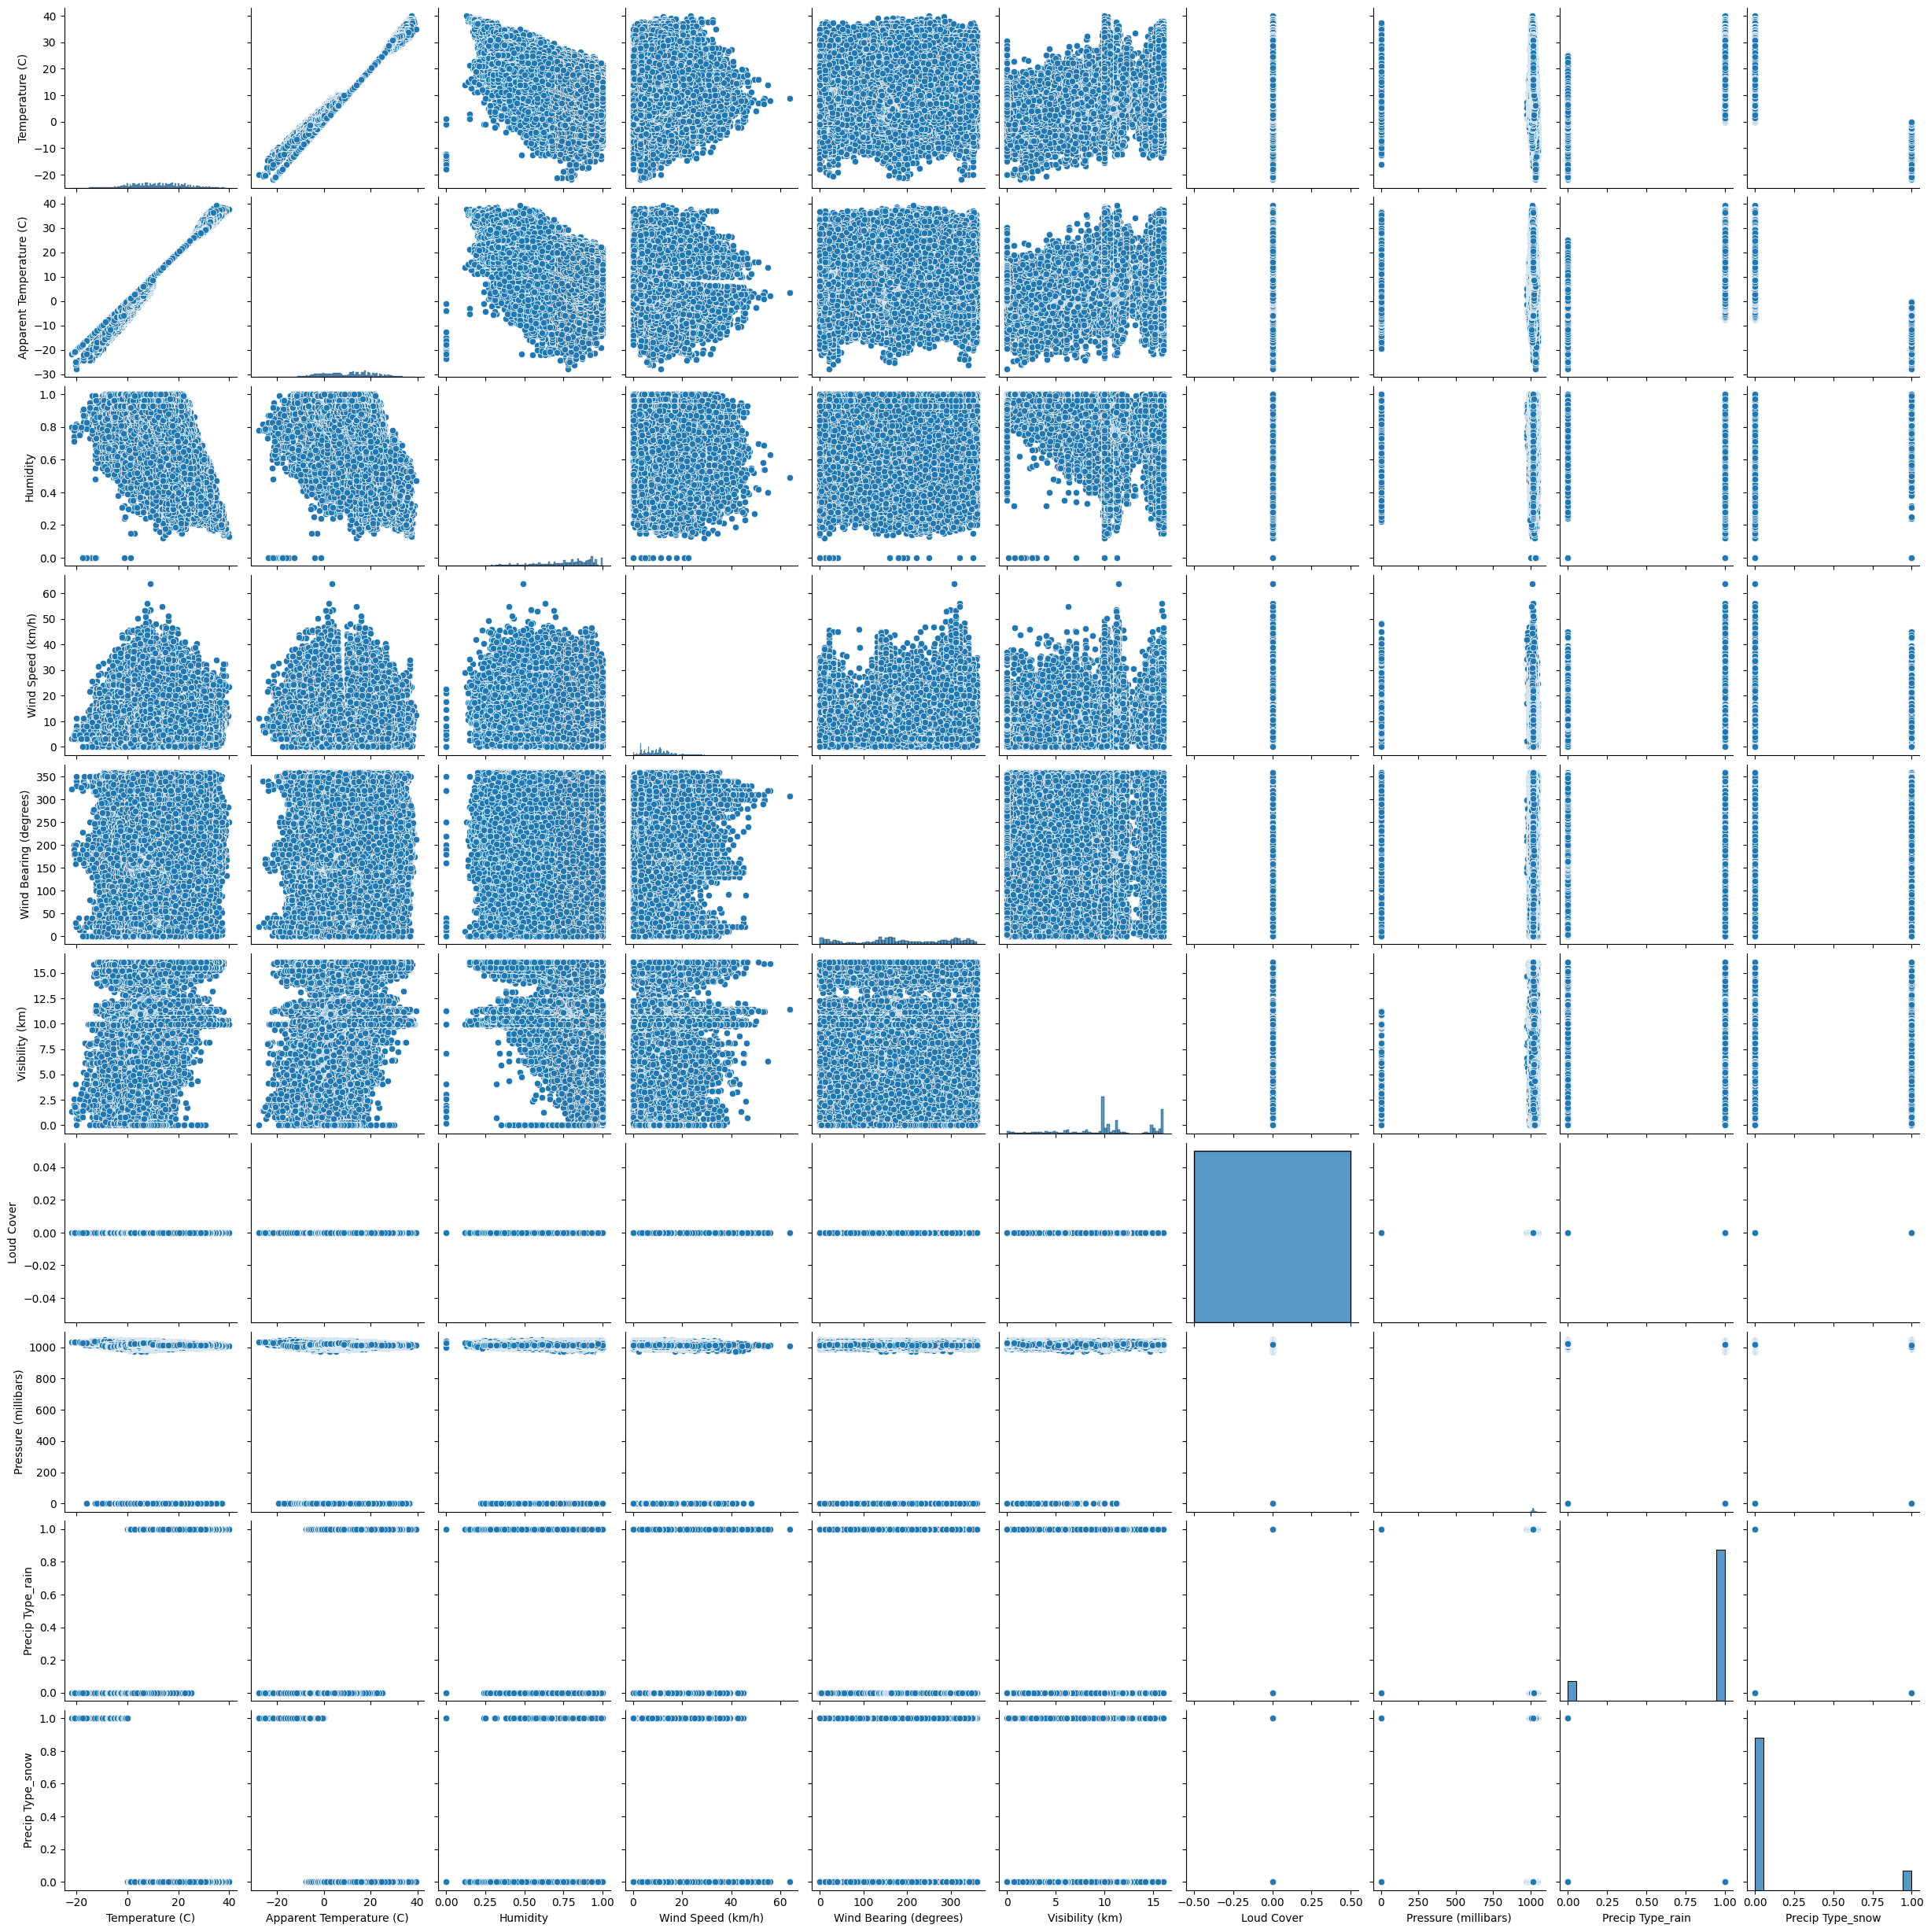

In [104]:
plt.figure(figsize=(15, 10))
sns.pairplot(df)
plt.show()

In [105]:
#boxplot

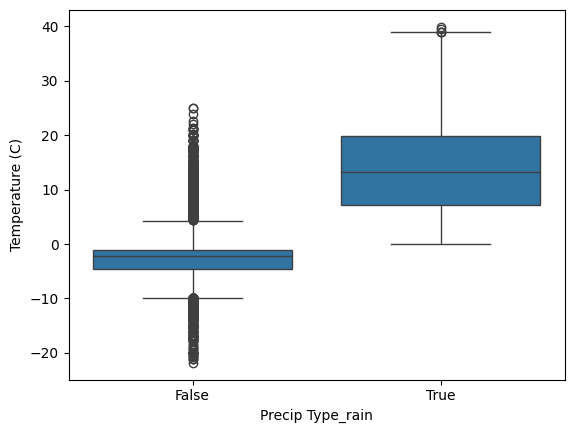

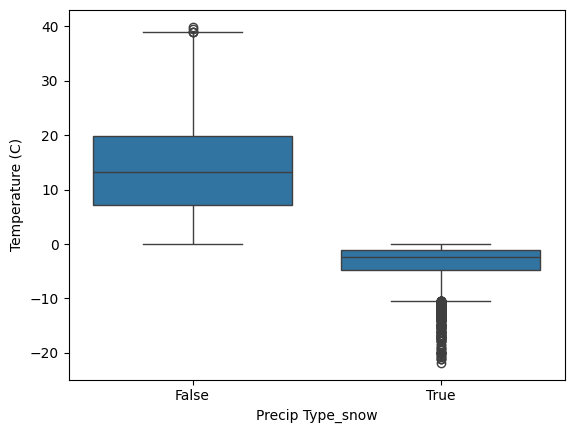

In [106]:
sns.boxplot(x="Precip Type_rain", y="Temperature (C)", data=df)
plt.show()

sns.boxplot(x="Precip Type_snow", y="Temperature (C)", data=df)
plt.show()

In [107]:
#corr heatmap

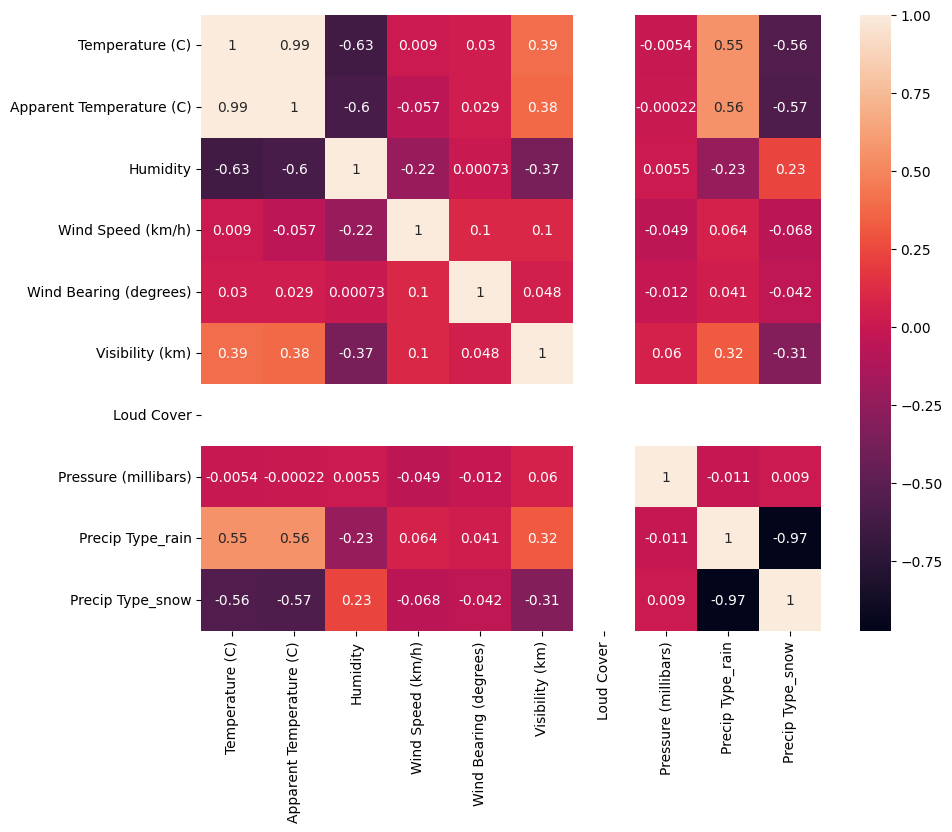

In [108]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True)
plt.show()

In [109]:
df.drop("Apparent Temperature (C)", axis=1, inplace = True)

In [110]:
#dependent independent variables
X = df.drop("Temperature (C)", axis = 1)
y = df["Temperature (C)"]

In [111]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

In [112]:
X_train.corr()

,Humidity,Wind Speed (km/h),Wind Bearing (degrees),Visibility (km),Loud Cover,Pressure (millibars),Precip Type_rain,Precip Type_snow
Humidity,1.000000,-0.224809,-0.002161,-0.367790,NaN,0.005139,-0.226904,0.230862
Wind Speed (km/h),-0.224809,1.000000,0.104804,0.100843,NaN,-0.048293,0.063296,-0.067017
Wind Bearing (degrees),-0.002161,0.104804,1.000000,0.049623,NaN,-0.009705,0.041523,-0.041792
Visibility (km),-0.367790,0.100843,0.049623,1.000000,NaN,0.061246,0.316646,-0.312080
Loud Cover,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Pressure (millibars),0.005139,-0.048293,-0.009705,0.061246,NaN,1.000000,-0.010269,0.008222
Precip Type_rain,-0.226904,0.063296,0.041523,0.316646,NaN,-0.010269,1.000000,-0.974112
Precip Type_snow,0.230862,-0.067017,-0.041792,-0.312080,NaN,0.008222,-0.974112,1.000000


In [113]:
def corr_for_dropping(df, threshold):
  columns_to_drop = set()
  corr = df.corr()
  for i in range(len(corr.columns)):
    for j in range(i):
      if abs(corr.iloc[i,j]) > threshold:
        columns_to_drop.add(corr.columns[i])
  return columns_to_drop

In [114]:
corr_for_dropping(X_train, 0.85)

{'Precip Type_snow'}

In [115]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Model:  LinearRegression()
MSE: 35.937045554681326
MAE: 4.924553278206033
R2: 0.6074374644108449


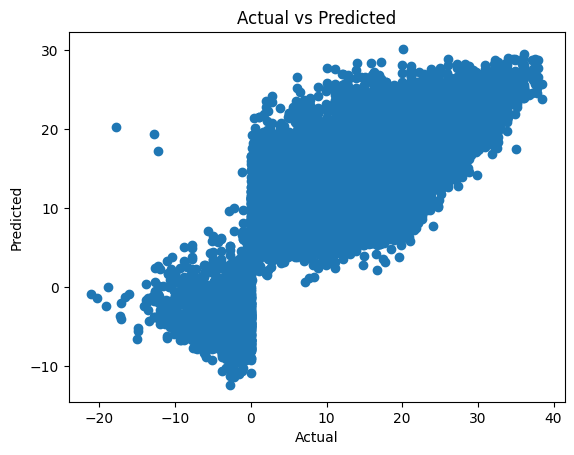

Model:  Lasso()
MSE: 39.57131452980119
MAE: 5.231264909845039
R2: 0.5677381006522064


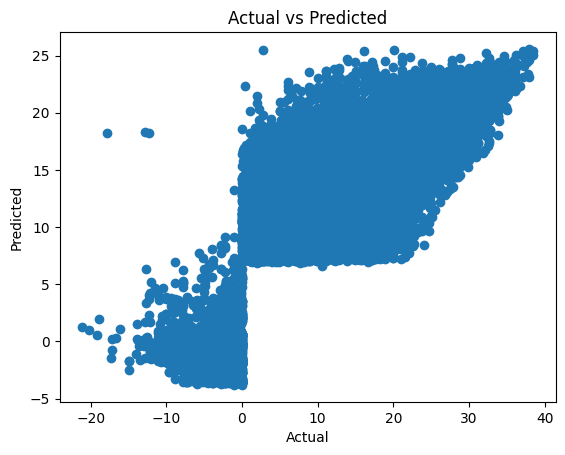

Model:  Ridge()
MSE: 35.9370489457402
MAE: 4.924555174323028
R2: 0.6074374273682153


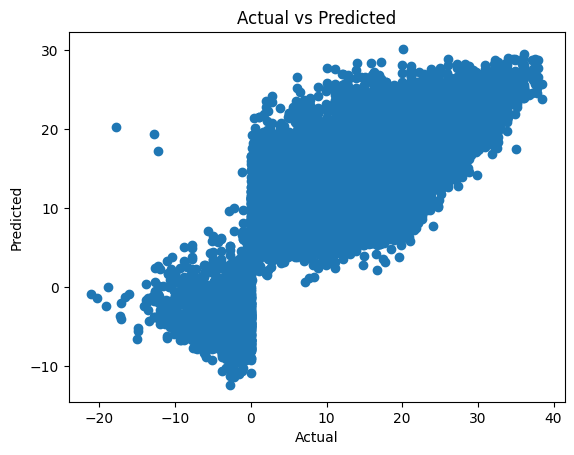

Model:  ElasticNet()
MSE: 42.14802393146356
MAE: 5.410820282615815
R2: 0.5395911130359352


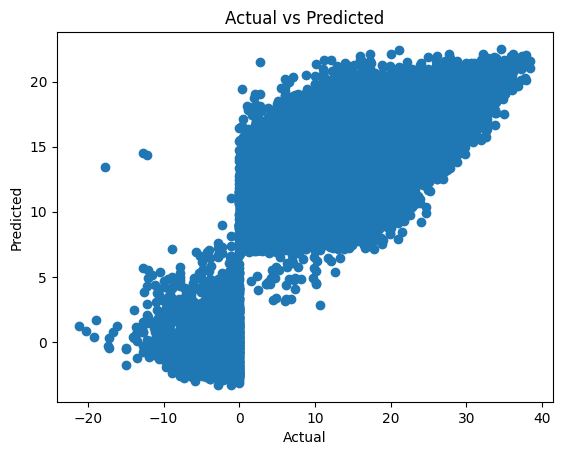

Model:  LassoCV(cv=5)
MSE: 35.93853707585643
MAE: 4.925214204746704
R2: 0.6074211716042064


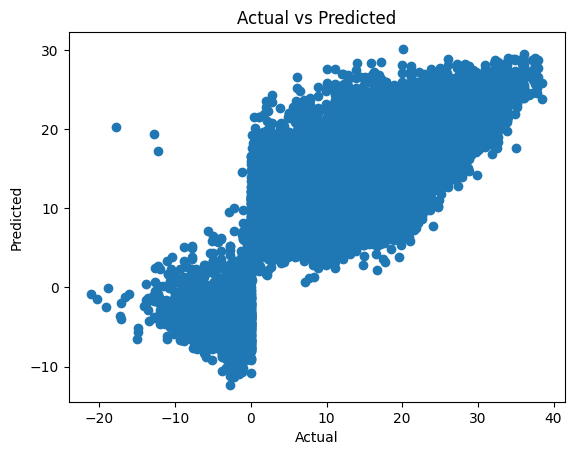

Model:  RidgeCV(cv=5)
MSE: 35.9370489457402
MAE: 4.924555174323028
R2: 0.6074374273682153


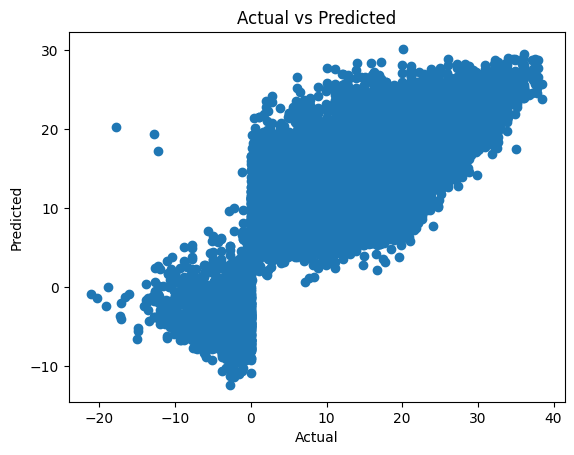

Model:  ElasticNetCV(cv=5)
MSE: 35.945404379886654
MAE: 4.9267990949737825
R2: 0.6073461558025133


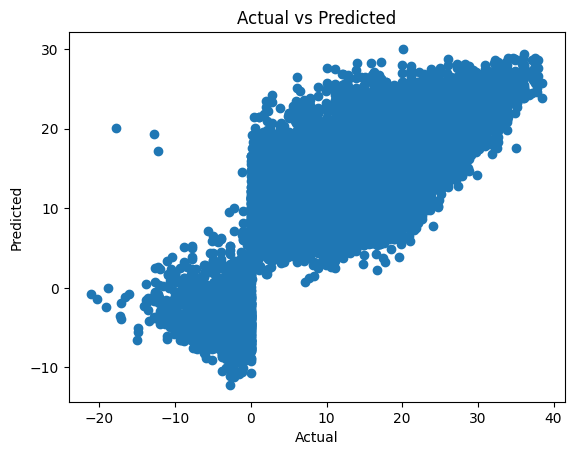

------------------------------------------------------------------
Best Model: LinearRegression()


In [126]:
linear = LinearRegression()
lasso = Lasso()
ridge = Ridge()
elastic = ElasticNet()
lassocv = LassoCV(cv = 5)
ridgecv = RidgeCV(cv = 5)
elasticcv = ElasticNetCV(cv = 5)
models = [linear, lasso, ridge, elastic, lassocv, ridgecv, elasticcv]
r2_scores = {}
for model in models:
  model.fit(X_train_scaled, y_train)
  y_pred = model.predict(X_test_scaled)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  r2_scores[model] = r2
  print("Model: ",model)
  print("MSE:", mse)
  print("MAE:", mae)
  print("R2:", r2)
  plt.scatter(y_test, y_pred)
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.title("Actual vs Predicted")
  plt.show()
print("------------------------------------------------------------------")
print("Best Model:", max(r2_scores, key=r2_scores.get))



> The model with the best R2 score is Linear Regression, but the high correlation between the “Precip Type_snow” and “Precip Type_rain” columns may negatively affect the model outputs. Therefore, the model has been rebuilt below after removing these two columns.


In [127]:
corr_for_dropping(X_train, 0.85)

{'Precip Type_snow'}

In [128]:
X_train_without_precip = X_train.drop(["Precip Type_snow", "Precip Type_rain"], axis = 1)
X_test_without_precip = X_test.drop(["Precip Type_snow", "Precip Type_rain"], axis = 1)

In [129]:
X_train_without_precip_scaled = scaler.fit_transform(X_train_without_precip)
X_test_without_precip_scaled = scaler.transform(X_test_without_precip)

Model:  LinearRegression()
MSE: 50.470264522648414
MAE: 5.735954852721613
R2: 0.4486821410313364


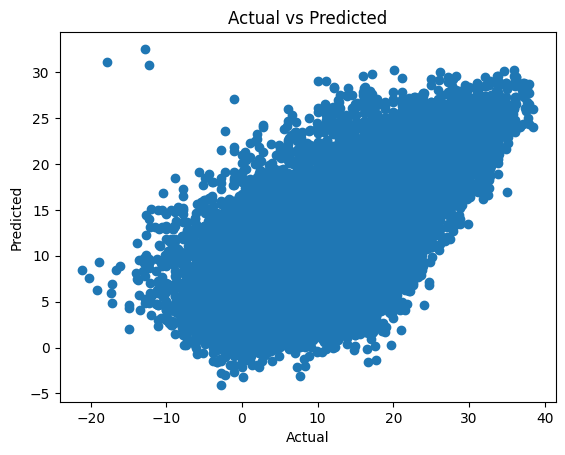

Model:  Lasso()
MSE: 53.79552546911476
MAE: 6.045489985926353
R2: 0.4123582627466237


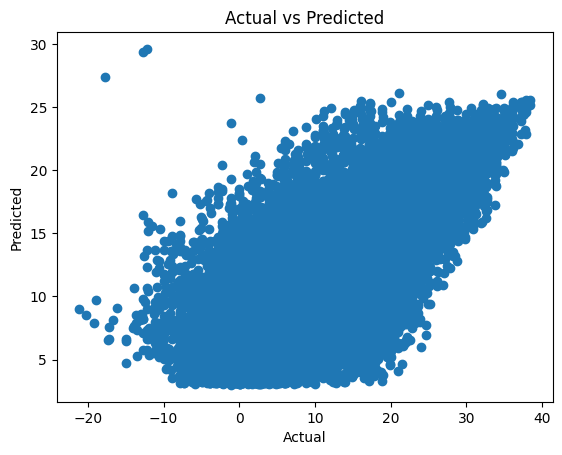

Model:  Ridge()
MSE: 50.470264170969315
MAE: 5.73595989264999
R2: 0.44868214487294433


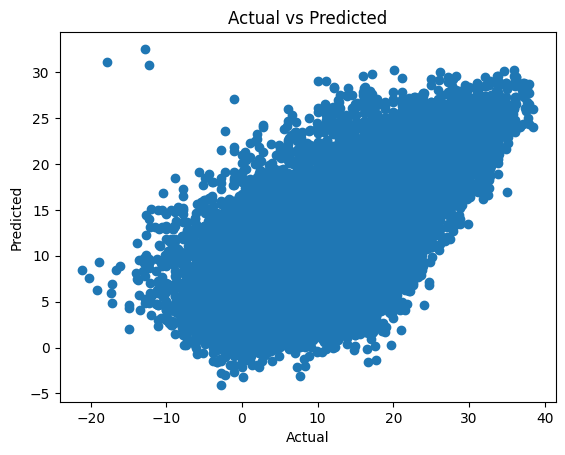

Model:  ElasticNet()
MSE: 56.90033857044698
MAE: 6.2412850507167565
R2: 0.3784424723755191


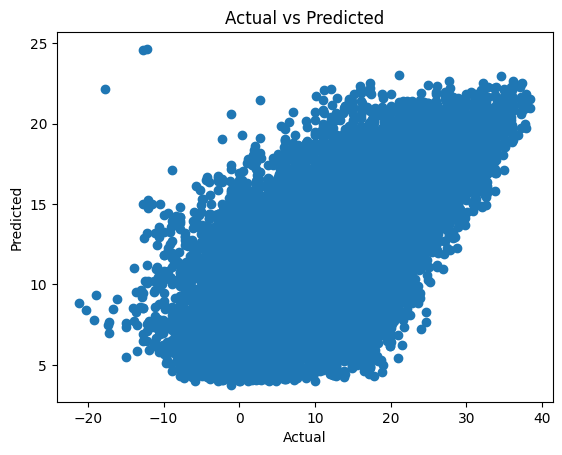

Model:  LassoCV(cv=5)
MSE: 50.472134846591686
MAE: 5.736863852793342
R2: 0.448661710328194


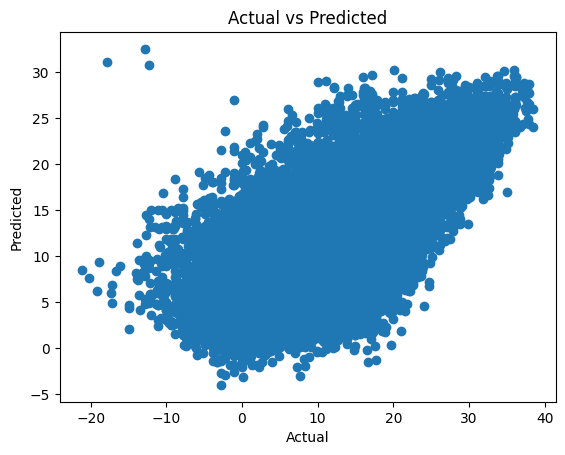

Model:  RidgeCV(cv=5)
MSE: 50.470261618475924
MAE: 5.7360052456802695
R2: 0.44868217275540556


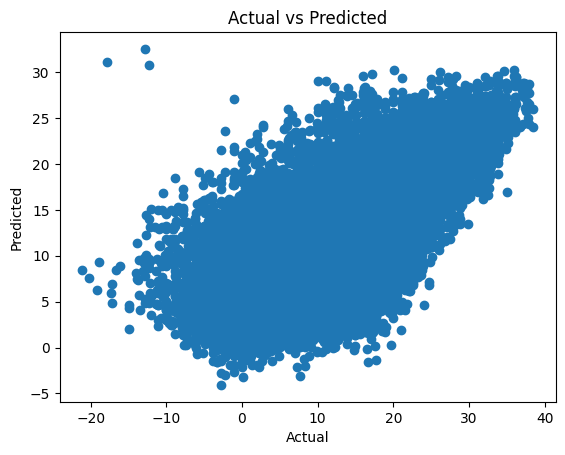

Model:  ElasticNetCV(cv=5)
MSE: 50.47412113983366
MAE: 5.73930901717897
R2: 0.4486400128208041


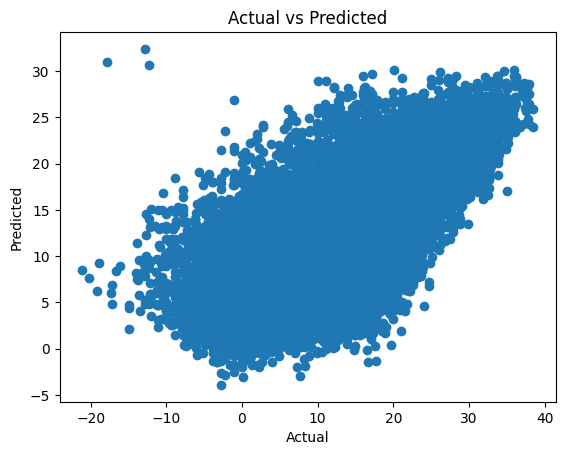

------------------------------------------------------------------
Best Model: LinearRegression()


In [130]:
r2_scores_without_precip = {}
for model in models:
  model.fit(X_train_without_precip_scaled, y_train)
  y_pred = model.predict(X_test_without_precip_scaled)
  mse = mean_squared_error(y_test, y_pred)
  mae = mean_absolute_error(y_test, y_pred)
  r2 = r2_score(y_test, y_pred)
  r2_scores_without_precip[model] = r2
  print("Model: ",model)
  print("MSE:", mse)
  print("MAE:", mae)
  print("R2:", r2)
  plt.scatter(y_test, y_pred)
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.title("Actual vs Predicted")
  plt.show()
print("------------------------------------------------------------------")
print("Best Model:", max(r2_scores, key=r2_scores.get))



> The above assumption is clearly seen to be incorrect, and it has been understood that the precip_type columns **positively affect** the model scores.

